**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
import collections
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X_train = np.array(X).astype(float)
        self.y_train = y
        self.N_class = int(np.amax(y) + 1)
        self.train_size = X.shape[0]

        if self.algorithm is 'brute':
            self.X_train_sq = np.sum(self.X_train ** 2, axis=1).reshape(1, -1)
        elif self.algorithm is 'kd_tree':
            self.X_tree = KDTree(self.X_train)

    def predict(self, X):
        if self.algorithm is 'brute':
            return self._predict_brute(X)
        elif self.algorithm is 'kd_tree':
            return self._predict_kd_tree(X)

    def predict_proba(self, X):
        if self.algorithm is 'brute':
            return self._predict_proba_brute(X)
        elif self.algorithm is 'kd_tree':
            return self._predict_proba_kd_tree(X)

    def score(self, X, y):
        return np.sum(y == self.predict(X)) / len(y)

    def _predict_brute(self, X):
        X_pred = np.array(X).astype(float)
        pred_size = X.shape[0]

        X_pred_sq = np.sum(X_pred ** 2, axis=1).reshape(-1, 1)
        cross_X = np.matmul(X_pred, self.X_train.T)
        dist = np.sqrt(X_pred_sq - 2 * cross_X + self.X_train_sq)

        sort_n_ind = np.argpartition(dist, (range(self.n_neighbors)), axis=1)
        nearest_class = y_train[sort_n_ind[:, :self.n_neighbors]]

        ans = np.zeros(pred_size)
        for ind in range(pred_size):
            cnt = collections.Counter(nearest_class[ind])
            ans[ind] = cnt.most_common(1)[0][0]
        return ans.astype(int)

    def _predict_proba_brute(self, X):
        X_pred = np.array(X).astype(float)
        pred_size = X.shape[0]

        X_pred_sq = np.sum(X_pred ** 2, axis=1).reshape(-1, 1)
        cross_X = np.matmul(X_pred, self.X_train.T)
        dist = np.sqrt(X_pred_sq - 2 * cross_X + self.X_train_sq)

        sort_n_ind = np.argpartition(dist, (range(self.n_neighbors)), axis=1)
        nearest_class = y_train[sort_n_ind[:, :self.n_neighbors]]

        ans = np.zeros((pred_size, self.N_class))
        for ind in range(pred_size):
            cnt = collections.Counter(nearest_class[ind])
            com_cnt = cnt.most_common(self.N_class)
            for item in com_cnt:
                ans[ind][int(item[0])] = item[1] / self.n_neighbors
        return ans

    def _predict_kd_tree(self, X):
        X_pred = np.array(X).astype(float)
        pred_size = X.shape[0]
        
        sort_n_ind = self.X_tree.query(X_pred, k=self.n_neighbors)[1]
        nearest_class = y_train[sort_n_ind[:, :self.n_neighbors]]
        
        ans = np.zeros(pred_size)
        for ind in range(pred_size):
            cnt = collections.Counter(nearest_class[ind])
            ans[ind] = cnt.most_common(1)[0][0]
        return ans.astype(int)
    
    def _predict_proba_kd_tree(self, X):
        X_pred = np.array(X).astype(float)
        pred_size = X.shape[0]
        
        sort_n_ind = self.X_tree.query(X_pred, k=self.n_neighbors)[1]
        nearest_class = y_train[sort_n_ind[:, :self.n_neighbors]]
        
        ans = np.zeros((pred_size, self.N_class))
        for ind in range(pred_size):
            cnt = collections.Counter(nearest_class[ind])
            com_cnt = cnt.most_common(self.N_class)
            for item in com_cnt:
                ans[ind][int(item[0])] = item[1] / self.n_neighbors
        return ans.astype(int)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target,
    test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 545 µs, sys: 53 µs, total: 598 µs
Wall time: 520 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 222 µs, sys: 22 µs, total: 244 µs
Wall time: 189 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 2.92 ms, sys: 103 µs, total: 3.02 ms
Wall time: 20 ms


array([2, 2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 925 µs, sys: 88 µs, total: 1.01 ms
Wall time: 766 µs


array([2, 2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.06 ms, sys: 100 µs, total: 1.16 ms
Wall time: 800 µs


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.59 ms, sys: 0 ns, total: 1.59 ms
Wall time: 1.24 ms


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

/home/george/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in sqrt


Best result on 17


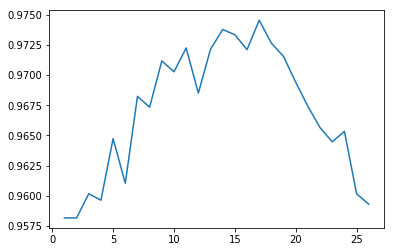

In [14]:
#%%pycodestyle


N_tests = 2000
bound_neigh = my_clf.train_size // 5

y = np.zeros((bound_neigh - 1, N_tests))
for test in range(N_tests):
    X_train, X_test, y_train, y_test = train_test_split(
        iris.data, iris.target, test_size=0.1,
        stratify=iris.target)

    for i in range(1, bound_neigh):
        iter_clf = MyKNeighborsClassifier(n_neighbors=i)
        iter_clf.fit(X_train, y_train)
        y[i - 1][test] = iter_clf.score(X_test, y_test)


x = np.arange(1, bound_neigh)
y = np.mean(y, axis=1)
plt.plot(x, y)

max_eff = np.argpartition(y, -1)[-1] + 1
print(f"Best result on {max_eff}")

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target,
    test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 10 ms, sys: 25 µs, total: 10.1 ms
Wall time: 9.52 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 421 ms, sys: 368 ms, total: 790 ms
Wall time: 399 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 4.45 s, sys: 492 ms, total: 4.95 s
Wall time: 2.9 s


array([9., 9., 9., 0., 9., 2., 0., 6., 4., 7., 3., 3., 8., 6., 1., 1., 9.,
       2., 7., 3., 0., 9., 8., 2., 7., 1., 1., 6., 8., 7., 3., 8., 9., 5.,
       1., 4., 2., 4., 1., 0., 8., 6., 9., 4., 0., 4., 3., 9., 6., 9., 2.,
       1., 0., 4., 1., 1., 7., 8., 1., 0., 1., 9., 3., 6., 6., 5., 8., 5.,
       6., 8., 8., 6., 3., 7., 1., 0., 6., 8., 6., 8., 7., 1., 2., 3., 0.,
       3., 3., 3., 1., 0., 4., 8., 7., 5., 4., 6., 5., 3., 0., 9., 7., 6.,
       7., 2., 9., 2., 0., 1., 5., 2., 9., 3., 1., 7., 9., 8., 9., 2., 0.,
       7., 7., 5., 9., 2., 8., 5., 4., 1., 0., 8., 0., 9., 0., 2., 2., 1.,
       8., 7., 9., 0., 3., 5., 3., 6., 4., 4., 5., 4., 4., 5., 4., 6., 3.,
       0., 4., 2., 9., 8., 0., 2., 2., 1., 8., 2., 3., 9., 5., 4., 9., 8.,
       6., 6., 7., 1., 9., 3., 9., 8., 0., 0., 1., 4., 4., 7., 4., 8., 6.,
       9., 5., 0., 5., 3., 5., 8., 7., 3., 9., 1., 7., 6., 2., 4., 1., 4.,
       5., 1., 4., 9., 6., 0., 1., 0., 4., 2., 5., 7., 5., 9., 6., 9., 5.,
       5., 1., 7., 1., 3.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 4.46 s, sys: 992 ms, total: 5.45 s
Wall time: 3.06 s


array([9, 9, 9, 0, 9, 2, 0, 6, 4, 7, 3, 3, 8, 6, 1, 1, 9, 2, 7, 3, 0, 9,
       8, 2, 7, 1, 1, 6, 8, 7, 3, 8, 9, 5, 1, 4, 2, 4, 1, 0, 8, 6, 9, 4,
       0, 4, 3, 9, 6, 9, 2, 1, 0, 4, 1, 1, 7, 8, 1, 0, 1, 9, 3, 6, 6, 5,
       8, 5, 6, 8, 8, 6, 3, 7, 1, 0, 6, 8, 6, 8, 7, 1, 2, 3, 0, 3, 3, 3,
       1, 0, 4, 8, 7, 5, 4, 6, 5, 3, 0, 9, 7, 6, 7, 2, 9, 2, 0, 1, 5, 2,
       9, 3, 1, 7, 9, 8, 9, 2, 5, 7, 7, 5, 9, 2, 8, 5, 4, 1, 3, 8, 0, 9,
       0, 2, 2, 1, 8, 7, 9, 0, 3, 5, 3, 6, 4, 4, 5, 4, 4, 5, 4, 6, 3, 0,
       4, 2, 9, 8, 0, 2, 2, 1, 8, 2, 8, 9, 5, 4, 9, 8, 6, 6, 7, 1, 9, 3,
       9, 8, 0, 0, 1, 4, 4, 7, 4, 8, 6, 9, 5, 0, 5, 3, 5, 8, 7, 3, 9, 1,
       7, 6, 2, 4, 1, 4, 5, 1, 4, 9, 6, 0, 1, 0, 4, 2, 5, 7, 5, 9, 6, 9,
       5, 5, 1, 7, 1, 3, 0, 7, 0, 9, 8, 8, 9, 8, 3, 7, 9, 8, 2, 6, 1, 4,
       0, 9, 8, 7, 2, 3, 4, 3, 7, 6, 6, 4, 4, 0, 1, 1, 3, 5, 5, 6, 3, 8,
       4, 0, 2, 3, 7, 9, 4, 4, 0, 6, 5, 3, 1, 7, 5, 1, 3, 6, 0, 2, 8, 2,
       9, 1, 0, 5, 6, 6, 1, 6, 2, 0, 1, 8, 4, 9, 1,

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 4.04 s, sys: 699 ms, total: 4.74 s
Wall time: 2.85 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 3.91 s, sys: 955 ms, total: 4.86 s
Wall time: 2.76 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
clf.score(X_test, y_test)

0.9714285714285714

In [25]:
my_clf.score(X_test, y_test)

0.9857142857142858

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=max_eff, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=max_eff, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target,
    test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 1min 11s, sys: 418 ms, total: 1min 11s
Wall time: 6min 34s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1min 11s, sys: 287 ms, total: 1min 11s
Wall time: 1min 11s


In [30]:
%time clf.predict(X_test)

CPU times: user 1min 20s, sys: 18.4 ms, total: 1min 21s
Wall time: 1min 21s


array([6., 2., 5., 6., 4., 0., 8., 5., 9., 0., 2., 6., 2., 4., 0., 8., 9.,
       9., 1., 3., 1., 9., 6., 2., 8., 3., 8., 3., 4., 7., 0., 5., 7., 8.,
       6., 4., 4., 9., 6., 8., 5., 7., 9., 0., 1., 8., 1., 0., 1., 2., 0.,
       5., 9., 1., 4., 2., 8., 6., 8., 8., 8., 5., 2., 7., 5., 0., 4., 4.,
       1., 4., 1., 9., 5., 2., 0., 1., 7., 6., 8., 9., 6., 1., 6., 5., 1.,
       3., 3., 3., 6., 8., 9., 1., 9., 8., 2., 8., 2., 5., 2., 4., 5., 7.,
       5., 1., 4., 7., 7., 0., 6., 6., 0., 0., 0., 3., 3., 7., 8., 8., 1.,
       0., 9., 5., 1., 9., 4., 7., 7., 0., 2., 1., 5., 5., 7., 1., 9., 8.,
       3., 3., 2., 6., 5., 7., 8., 6., 3., 7., 9., 3., 1., 7., 5., 9., 3.,
       4., 9., 7., 6., 9., 7., 8., 3., 6., 7., 7., 0., 7., 0., 7., 7., 2.,
       1., 0., 8., 9., 8., 0., 6., 7., 9., 4., 9., 0., 6., 3., 0., 4., 4.,
       9., 3., 8., 4., 2., 5., 6., 6., 9., 8., 4., 5., 9., 2., 6., 5., 4.,
       6., 9., 7., 7., 9., 1., 5., 3., 6., 2., 7., 1., 7., 8., 5., 0., 7.,
       7., 2., 5., 0., 5.

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn -- высокоуровневая библиотека для визуализации данных, основанная на matplotlib
# matplotlib -- библиотека для визуализации двумерных данных
# train_test_split -- функция рандомизированного деления данных на тренировочные и тестирующие
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) -- класс для последовательного преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler) -- класс для стандартизации данных
# ClassifierMixin -- класс-примесь для классификаторов scikit-learn
# NeighborsBase -- базовый класс для классификатора по соседям
# KNeighborsMixin -- базовый класс для поиска K ближайших соседей
# SupervisedIntegerMixin -- базовый класс для метода fit